In [22]:
from gensim.models import Word2Vec 
import numpy as np

In [18]:
# Load the pre-trained Word2Vec model
model_dict = {'Phase 1': 'word2vec_model_Phase_1.model',
              'Phase 2': 'word2vec_model_Phase_2.model',
              'Phase 3': 'word2vec_model_Phase_3.model'}

for phase, model_path in model_dict.items():
    # Load the model
    model = Word2Vec.load(model_path)
    
    # Get the vocabulary
    vocab = list(model.wv.key_to_index.keys())
    
    # Print the vocabulary
    # print(f"Vocabulary for {phase}:")
    # print(vocab)
    
    # Print the number of words in the vocabulary
    print(f"Number of words in {phase} vocabulary: {len(vocab)}")
    
    # Print a few example words
    print(f"Example words from {phase} vocabulary: {vocab[:10]}")
    print("\n")

Number of words in Phase 1 vocabulary: 108703
Example words from Phase 1 vocabulary: ['the', 'to', 'of', 'and', 'in', 'a', 'that', 'I', 'is', 'be']


Number of words in Phase 2 vocabulary: 214465
Example words from Phase 2 vocabulary: ['the', 'to', 'of', 'and', 'I', 'in', 'a', 'is', 'that', 'not']


Number of words in Phase 3 vocabulary: 164471
Example words from Phase 3 vocabulary: ['the', 'to', 'of', 'I', 'and', 'in', 'a', 'is', 'that', 'not']




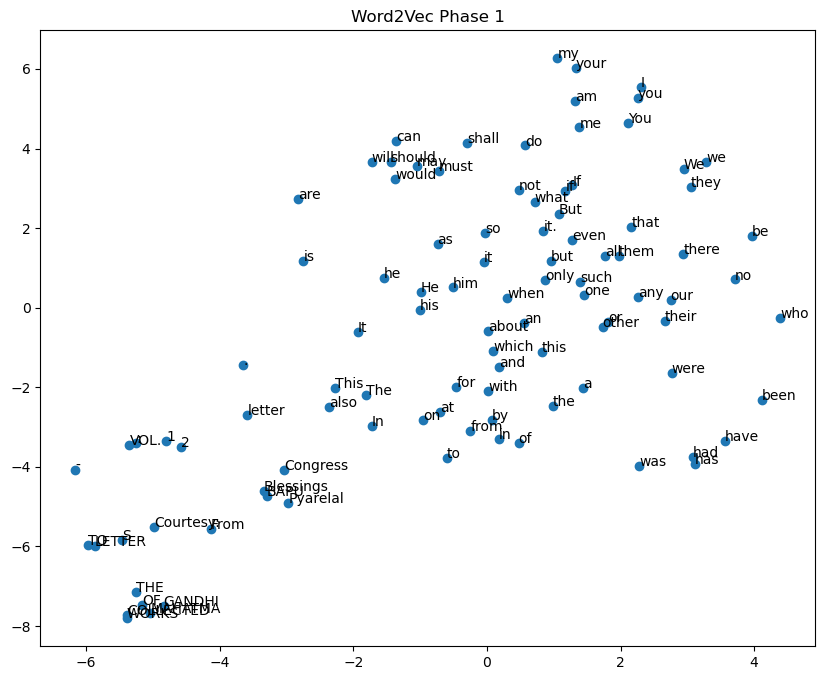

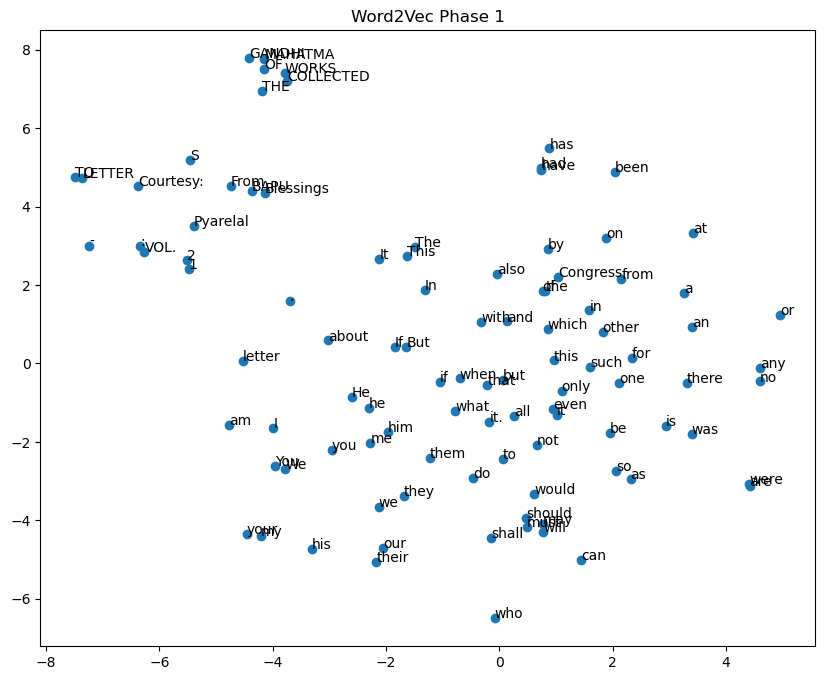

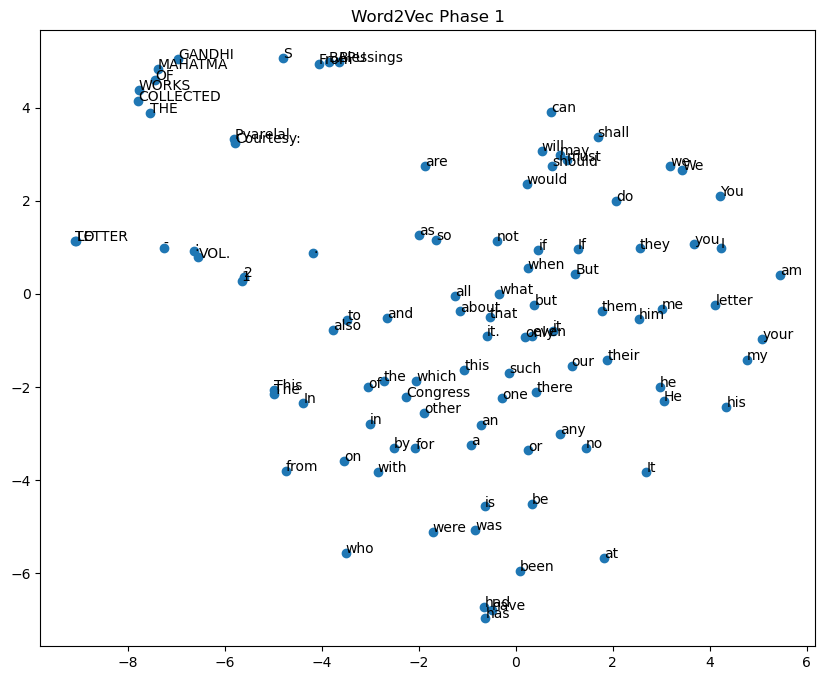

In [23]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

def tsne_plot(model, words, label):
    word_vectors = [model.wv[word] for word in words if word in model.wv]
    tsne = TSNE(n_components=2, random_state=0, perplexity=30)
    Y = tsne.fit_transform(np.array(word_vectors))
    
    plt.figure(figsize=(10, 8))
    plt.scatter(Y[:, 0], Y[:, 1])
    for i, word in enumerate(words):
        plt.annotate(word, xy=(Y[i, 0], Y[i, 1]))
    plt.title(label)
    plt.show()

for phase, model_path in model_dict.items():
    # Load the model
    model = Word2Vec.load(model_path)
    tsne_plot(model, vocab[:100], "Word2Vec Phase 1")

In [26]:
for phase, model_path in model_dict.items():
    # Load the model
    model = Word2Vec.load(model_path)

    # Find the most similar words to keyword list
    keywords = ['corruption', 'British']

    print(f"\nMost similar words to keywords in {phase}:")
    
    # Find the most similar words to the keywords
    similar_words = []
    for keyword in keywords:
        try:
            similar = model.wv.most_similar(keyword, topn=10)
            similar_words.append((keyword, similar))
            print(f"  Most similar words to '{keyword}':")
            for word, similarity in similar:
                print(f"    {word}: {similarity:.4f}")
        except KeyError:
            print(f"Keyword '{keyword}' not found in the model vocabulary.")


Most similar words to keywords in Phase 1:
  Most similar words to 'corruption':
    single-handed,: 0.3846
    Mother-country.: 0.3786
    GORGES: 0.3676
    B.A.: 0.3669
    Maulvi: 0.3626
    gifts’—this: 0.3622
    That): 0.3563
    BOKSBURG: 0.3557
    that—is: 0.3533
    transference.: 0.3504
  Most similar words to 'British':
    South: 0.9813
    Africa: 0.9734
    Transvaal: 0.9712
    Indians: 0.9692
    community: 0.9691
    under: 0.9688
    Africa.: 0.9673
    Africa,: 0.9642
    passive: 0.9555
    Imperial: 0.9531

Most similar words to keywords in Phase 2:
  Most similar words to 'corruption':
    discipline.: 0.9872
    female: 0.9869
    seed: 0.9862
    restoration: 0.9861
    played: 0.9857
    prisons: 0.9857
    widows: 0.9857
    hardship: 0.9856
    binding: 0.9856
    Russia: 0.9856
  Most similar words to 'British':
    Indians: 0.9534
    Indian: 0.9432
    Transvaal: 0.9371
    Natal: 0.9297
    indentured: 0.9280
    local: 0.9262
    community: 0.9235
   

In [11]:
# Take user input for a word
word = input("Enter a word to find its vector representation: ")

# Get the vector representation of the word
try:
    word_vector = model.wv[word]
    print(f"Vector representation of '{word}': {word_vector}")
    # Find the most similar words to input"
    similar_words = model.wv.most_similar(word, topn=10)
except KeyError:
    print(f"'{word}' not found in the vocabulary.")


Vector representation of 'corruption': [-0.3071846  -0.16986261  0.24382703  0.44948947 -0.33338794 -0.5825755
  0.42599824  0.510166   -0.16396478 -0.5995941  -0.03911551 -0.427977
 -0.459653    0.11343037  0.10349775 -0.00396546  0.2117004  -0.4766146
 -0.19187829 -0.3733604   0.2986089   0.26503122  0.34738562 -0.4482629
  0.2724958  -0.13281159 -0.32682085 -0.19033614 -0.08992137  0.23118359
  0.45771712  0.08356082  0.28556418 -0.1611731   0.07988834  0.22735682
  0.19347295 -0.2786804  -0.13479409 -0.44878632 -0.3034332  -0.37835
 -0.463339    0.18419956  0.2734431   0.2562554  -0.25737113  0.14293516
  0.37513703  0.296042   -0.06384351 -0.10036561 -0.06549443 -0.39084625
  0.35873514  0.35416475  0.00427752 -0.1998214  -0.0527464   0.13878179
 -0.2508684   0.39061058 -0.16396904 -0.16918594 -0.4966776   0.2916621
 -0.0342145   0.1720171  -0.13038482  0.05199529  0.0248208  -0.06326141
  0.3163952  -0.35612255  0.57987964  0.57908297  0.16003266 -0.30521813
 -0.2584842  -0.33131

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

def tsne_plot(model, words, label):
    word_vectors = [model.wv[word] for word in words if word in model.wv]
    tsne = TSNE(n_components=2, random_state=0, perplexity=30)
    Y = tsne.fit_transform(word_vectors)
    
    plt.figure(figsize=(10, 8))
    plt.scatter(Y[:, 0], Y[:, 1])
    for i, word in enumerate(words):
        plt.annotate(word, xy=(Y[i, 0], Y[i, 1]))
    plt.title(label)
    plt.show()


Most similar words to woman:


TypeError: unsupported format string passed to list.__format__